In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from   astropy.table import Table

In [2]:
sys.path.append(os.environ['HOME'] + '/DESI/')

In [3]:
import pubplot

In [4]:
# TODO: findfile
fpath  = os.environ['HOME'] + '/data/GAMA4/gama_desi.fits'
dat    = Table.read(fpath)

In [6]:
good_match = dat['GOOD_MATCH'] == True

In [7]:
np.mean(good_match)

0.248278167248674

In [8]:
dat_gm  = dat[good_match]

In [9]:
names, cnts = np.unique(dat_gm['MORPHTYPE'], return_counts=True)

for n, c in zip(names, cnts):
    print(n.ljust(16), c)

DEV              2625
EXP              2234
PSF              44
REX              3655
SER              19668


Text(0.5, 0, '$r_{\\rm Petro}$')

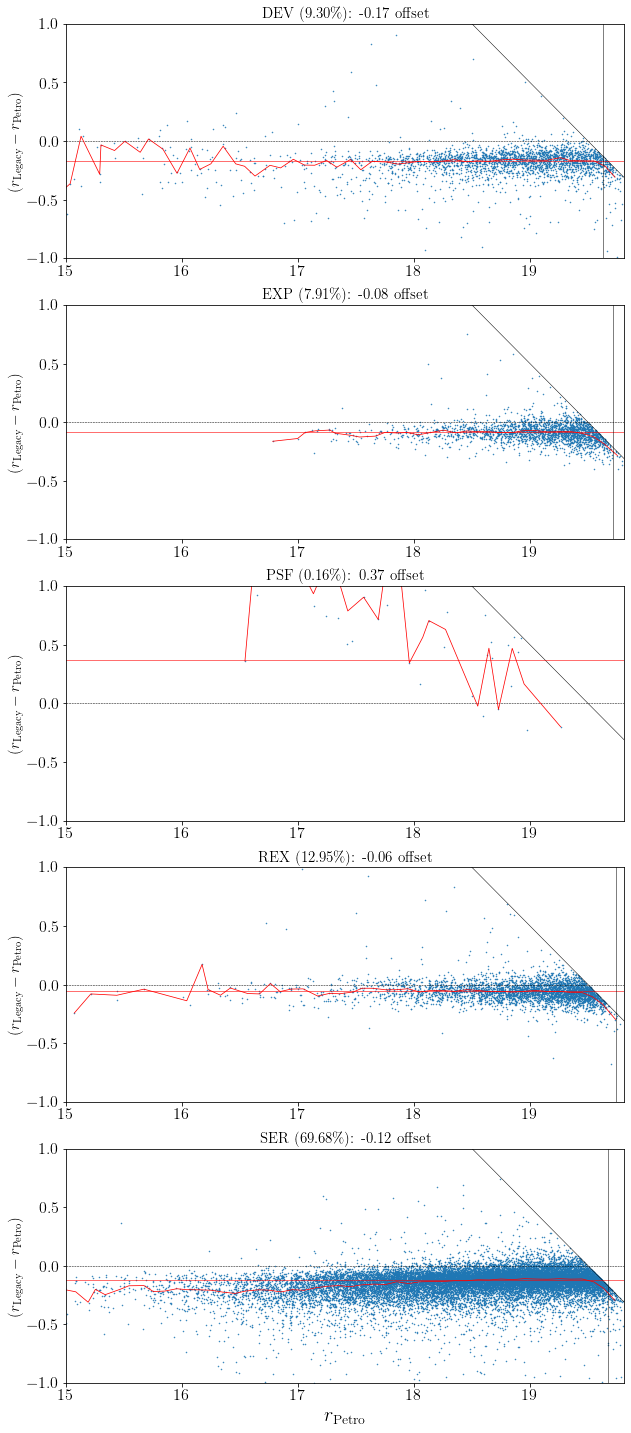

In [10]:
figure_mosaic = '''
00
11
22
33
44
'''

fig, axes  = plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(10,25))

morphtypes = np.unique(dat_gm['MORPHTYPE'])

bins       = np.arange(12, 20.5, 0.1)

for label, ax in axes.items():
    morphtype  = morphtypes[int(label)]
    
    is_morph   = dat_gm['MORPHTYPE'] == morphtype
    
    dat_type   = dat_gm[is_morph]
    
    f_match    = np.mean(is_morph)

    # print(morphtype, f_match)
    
    idxs       = np.digitize(dat_type['R_PETRO'], bins=bins)
    offset     = dat_type['RMAG_DRED'] - dat_type['R_PETRO']

    result     = []
    
    for idx in range(len(bins) - 1):
        if np.count_nonzero(idxs == idx):
            mag        = np.median(dat_type['R_PETRO'].data[idxs == idx])
            offset_mag = np.median(offset[idxs == idx])
        
            result.append([mag, offset_mag])
        
    result = np.array(result)
  
    # print(result.shape)

    ax.plot(bins, 19.5 - bins, c='k', lw=0.5)
    
    ax.set_ylabel(r'$(r_{\rm Legacy} - r_{\rm Petro})$', fontsize=15)
    ax.axhline(0, ls='--', color='k', linewidth=0.5)
    ax.scatter(dat_type['R_PETRO'], dat_type['RMAG_DRED'] - dat_type['R_PETRO'], s=0.25)
    
    ax.plot(result[:,0], result[:,1], color='r', lw=.75)
    
    is_flat     = (result[:,0] > 18.) & (result[:,0] < 19.) 
    flat_offset = np.mean(result[:,1][is_flat])
    
    ax.axhline(flat_offset, c='red', lw=0.75, alpha=0.75)
    
    ax.set_title(morphtype + ' ({:.2f}\%): {:.2f} offset'.format(100. * f_match, flat_offset), fontsize=15)
    
    ax.axvline(19.8 + flat_offset, c='k', lw=0.5)
    
    ax.set_xlim(15., 19.81)
    ax.set_ylim(-1.0, 1.00)
    
ax.set_xlabel(r'$r_{\rm Petro}$')

# Done.